In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.drop('Cabin',axis = 1)
df_test = df_test.drop('Cabin',axis = 1)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## Some Visuals: To get more Insights

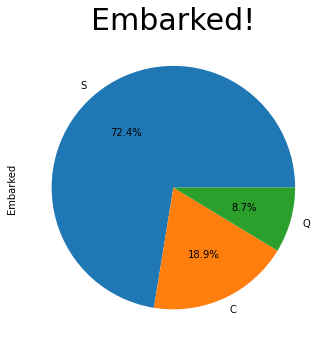

In [10]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Embarked!',fontsize = 30)
df['Embarked'].value_counts().plot.pie(autopct="%1.1f%%")

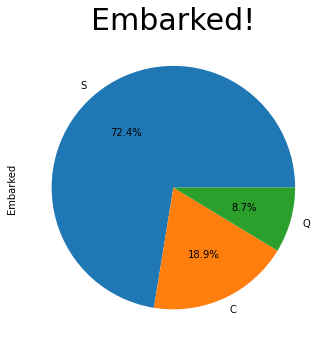

In [11]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Embarked!',fontsize = 30)
df['Embarked'].value_counts().plot.pie(autopct="%1.1f%%")

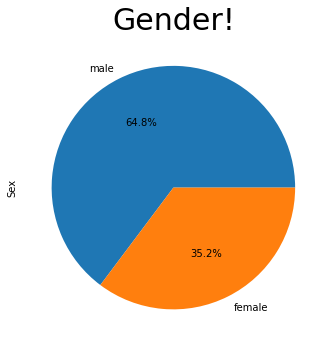

In [12]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender!',fontsize = 30)
df['Sex'].value_counts().plot.pie(autopct="%1.1f%%")

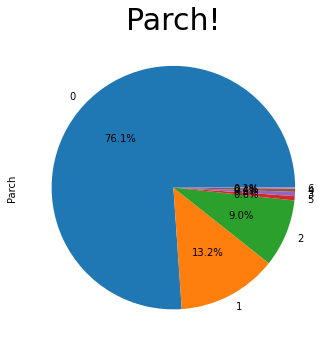

In [13]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Parch!',fontsize = 30)
df['Parch'].value_counts().plot.pie(autopct="%1.1f%%")

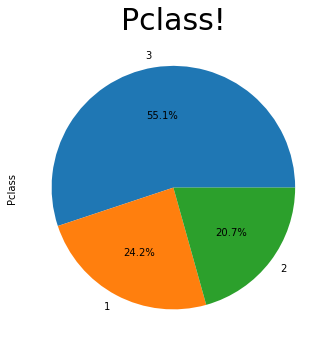

In [14]:

plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Pclass!',fontsize = 30)
df['Pclass'].value_counts().plot.pie(autopct="%1.1f%%")

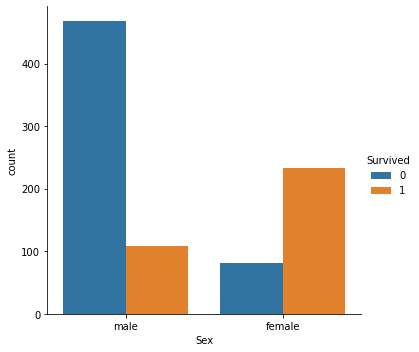

In [15]:
sns.catplot(x = 'Sex', hue = 'Survived',data = df, kind = 'count')

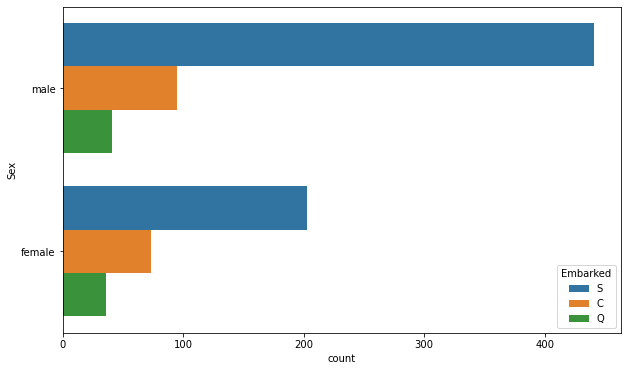

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(y="Sex",hue ='Embarked',data=df)

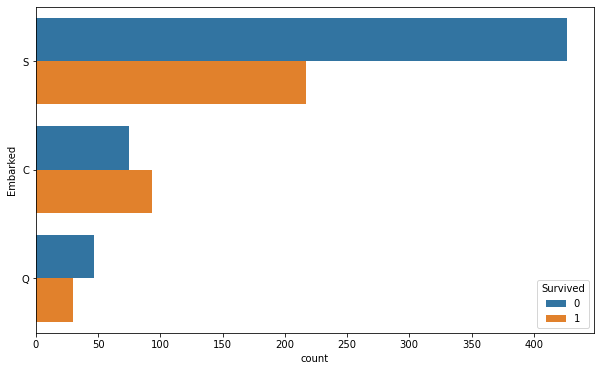

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y="Embarked",hue ='Survived',data=df)

In [18]:
Female = df[df['Sex'] == 'female']
Male = df[df['Sex'] == 'male']

In [19]:
Female['Age'].unique()

array([38.  , 26.  , 35.  , 27.  , 14.  ,  4.  , 58.  , 55.  , 31.  ,
         nan, 15.  ,  8.  , 18.  , 40.  ,  3.  , 19.  , 49.  , 29.  ,
       21.  ,  5.  , 17.  , 16.  , 30.  , 33.  , 23.  , 34.  , 28.  ,
       14.5 , 20.  ,  2.  , 32.5 , 47.  , 22.  , 24.  ,  9.  , 45.  ,
        1.  , 50.  , 32.  , 44.  , 25.  , 41.  , 63.  , 36.  , 60.  ,
       42.  , 10.  , 13.  ,  0.75, 54.  , 37.  ,  7.  , 11.  , 48.  ,
       39.  , 53.  , 52.  , 43.  ,  6.  , 51.  , 30.5 , 57.  , 62.  ,
       56.  ])

In [20]:
Female['Age'].mean()

27.915708812260537

### Distibution of female-age plot

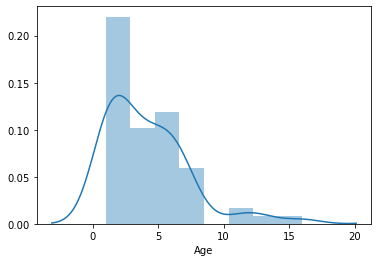

In [21]:
sns.distplot(Female.Age.value_counts())

### Distibution of male-age plot

In [22]:
Male['Age'].unique()

array([22.  , 35.  ,   nan, 54.  ,  2.  , 20.  , 39.  , 34.  , 28.  ,
       19.  , 40.  , 66.  , 42.  , 21.  ,  7.  , 65.  , 28.5 , 11.  ,
       45.  ,  4.  , 26.  , 32.  , 25.  ,  0.83, 29.  , 16.  , 24.  ,
       46.  , 59.  , 71.  , 23.  , 33.  , 37.  , 38.  , 47.  , 70.5 ,
       32.5 , 12.  , 18.  , 27.  , 36.5 , 51.  , 55.5 , 40.5 , 30.  ,
       44.  , 17.  ,  1.  ,  9.  , 61.  , 56.  , 36.  ,  3.  , 45.5 ,
       20.5 , 62.  , 52.  , 23.5 ,  0.92, 43.  , 15.  , 50.  , 64.  ,
       31.  , 49.  , 48.  , 58.  , 55.  ,  8.  , 60.  , 57.  , 80.  ,
       70.  , 24.5 , 14.  ,  6.  ,  0.67, 41.  ,  0.42, 30.5 , 10.  ,
       34.5 , 74.  ])

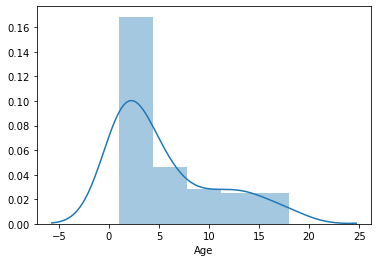

In [23]:
sns.distplot(Male.Age.value_counts())

In [24]:
Male['Age'].mean()

30.72664459161148

## Filling the missing values

In [25]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.Embarked.fillna(df.Embarked.mode,inplace=True)

In [26]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
df.drop(['Name','PassengerId'],axis = 1,inplace=True)


In [28]:
df.drop(['Embarked'],axis= 1,inplace = True)
df.drop('Ticket',axis = 1,inplace = True)
df['Sex']=pd.get_dummies(df[['Sex']],drop_first=True)


In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [30]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Splitting of data into train and test

In [31]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.20, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling with Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = LogR.predict(X_test)
LogR.score(X_train,y_train)

0.8019662921348315

In [36]:
LogR.score(X_test,y_test)

0.7988826815642458

## Modelling with XGBClassifier

In [37]:
from xgboost import XGBClassifier
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
xbg_pred = model.predict(X_test)
model.score(X_train,y_train)

0.9634831460674157

In [39]:
model.score(X_test,y_test)

0.8156424581005587

In [40]:
print(model.feature_importances_)

[0.2010305  0.6151088  0.03645358 0.07589259 0.03488223 0.03663237]


## Feature Importance Plotting

In [41]:
features = X.columns
importances = model.feature_importances_

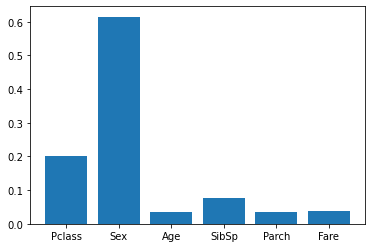

In [42]:
pyplot.bar(features,importances)
pyplot.show()

## Predictions on Test_Data

In [43]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [44]:
df_test.Age.fillna(df_test.Age.mean(),inplace=True)
df_test.Embarked.fillna(df_test.Embarked.mode,inplace=True)
df_test.Fare.fillna(df_test.Fare.mean(), inplace = True)

In [45]:
df_test.drop(['Embarked'],axis= 1,inplace = True)
df_test.drop('Ticket',axis = 1,inplace = True)
df_test['Sex']=pd.get_dummies(df[['Sex']],drop_first=True)


In [46]:
df_test.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [47]:
df_name = df_test['PassengerId']

In [48]:
df_test.drop(['Name','PassengerId'],axis = 1,inplace=True)

In [49]:
X_df_test= scaler.fit_transform(df_test)

In [50]:
xgb_predictions = model.predict(X_df_test)

In [51]:
#Create a  DataFrame
submission = pd.DataFrame({'PassengerId':df_name,'Survived':xgb_predictions})
                        

#Visualize the first 10 rows
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
5,897,1
6,898,0
7,899,0
8,900,0
9,901,0


In [52]:
##% Submit Predictions 
submission.to_csv('submission.csv',index=False)